## Importing libraries and data

In [1]:
import numpy as np
import pandas as pd

#Importing data visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\SampleSuperstore.csv")
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
print('Shape of dataframe;',df.shape)
print(df.columns)

Shape of dataframe; (9994, 13)
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


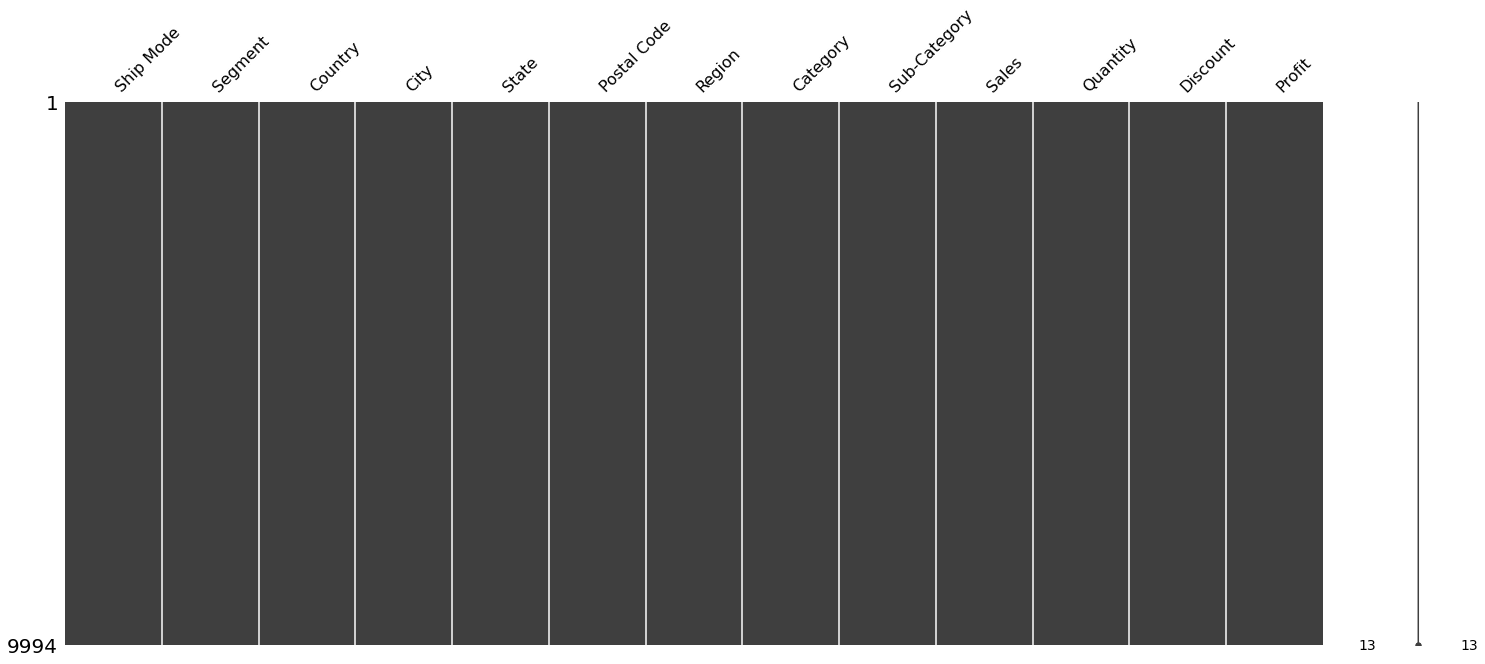

In [4]:
msno.matrix(df)

**There are no missing values in the dataframe.**

## Exploratory Data Analysis

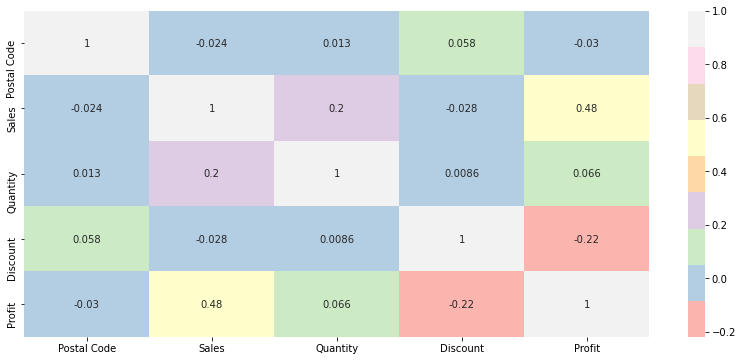

In [5]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')

### Univariate analysis of Categorical columns

### Segment, Ship mode, Category, Region

Text(0.5, 1.0, 'Region')

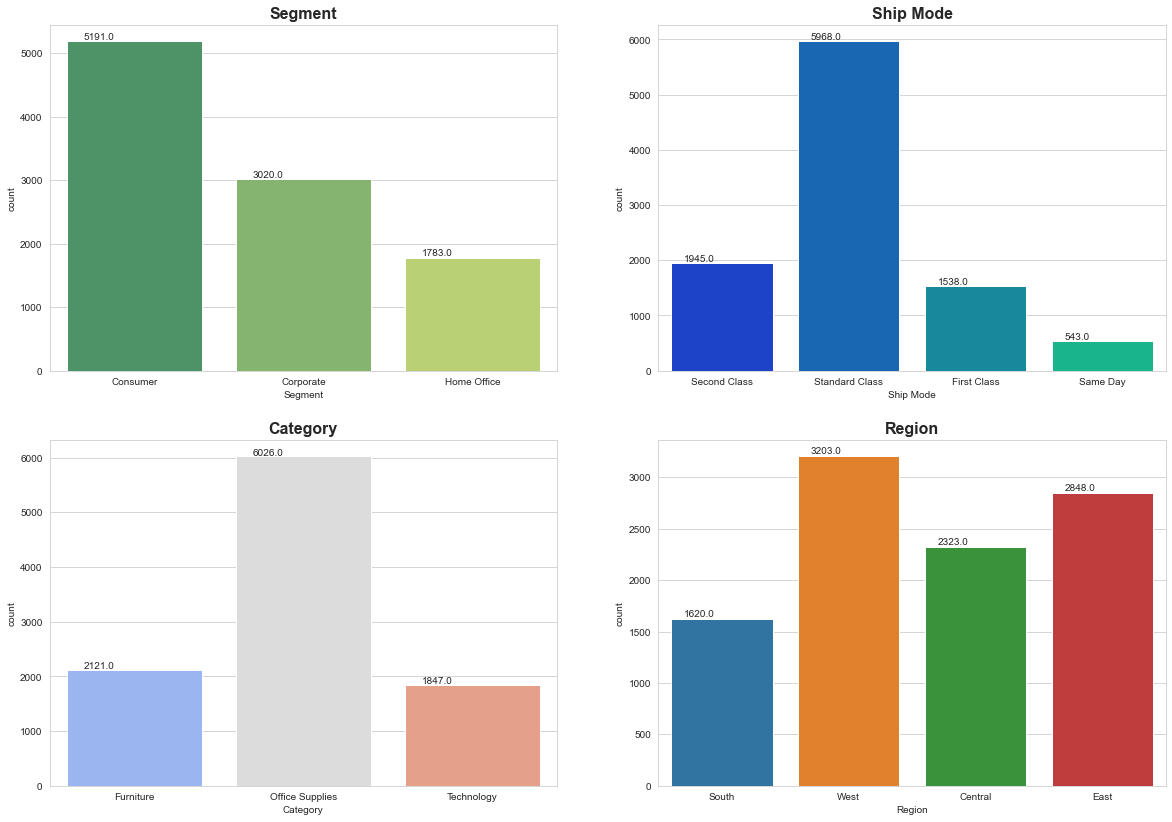

In [6]:
sns.set_style('whitegrid')
fig,axes=plt.subplots(2,2,figsize=(20,14))
ax1=sns.countplot(df['Segment'],ax=axes[0,0],palette='summer')
ax2=sns.countplot(df['Ship Mode'],ax=axes[0,1],palette='winter')
ax3=sns.countplot(df['Category'],ax=axes[1,0],palette='coolwarm')
ax4=sns.countplot(df['Region'],ax=axes[1,1])

for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+25))
for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+25))
for p in ax3.patches:
    ax3.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+25))
for p in ax4.patches:
    ax4.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+25))
    
axes[0,0].set_title('Segment',fontweight='bold',fontsize=16)
axes[0,1].set_title('Ship Mode',fontweight='bold',fontsize=16)
axes[1,0].set_title('Category',fontweight='bold',fontsize=16)
axes[1,1].set_title('Region',fontweight='bold',fontsize=16)

### Quantity

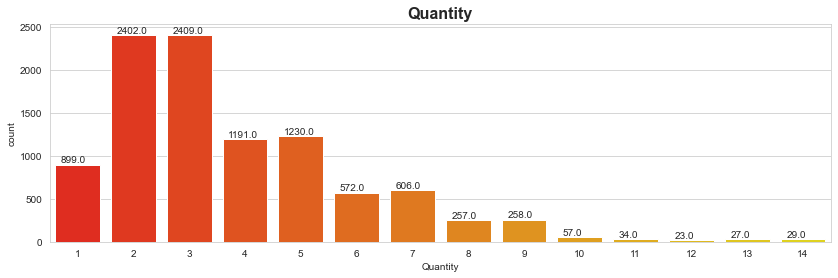

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,4))
plt.xticks(rotation=0)
plt.title('Quantity',fontweight='bold',fontsize=16)
ax=sns.countplot(df['Quantity'],palette='autumn')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+25))

### Sub category

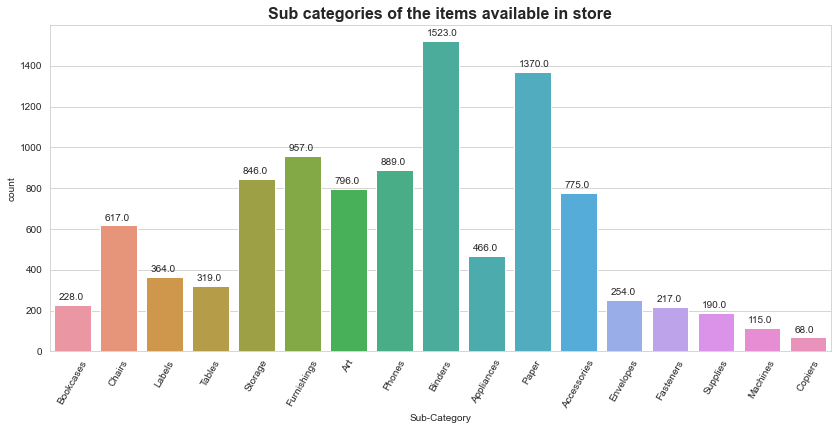

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
plt.xticks(rotation=60)
plt.title('Sub categories of the items available in store',fontweight='bold',fontsize=16)
ax=sns.countplot(df['Sub-Category'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+25))

### State wise most number of orders placed

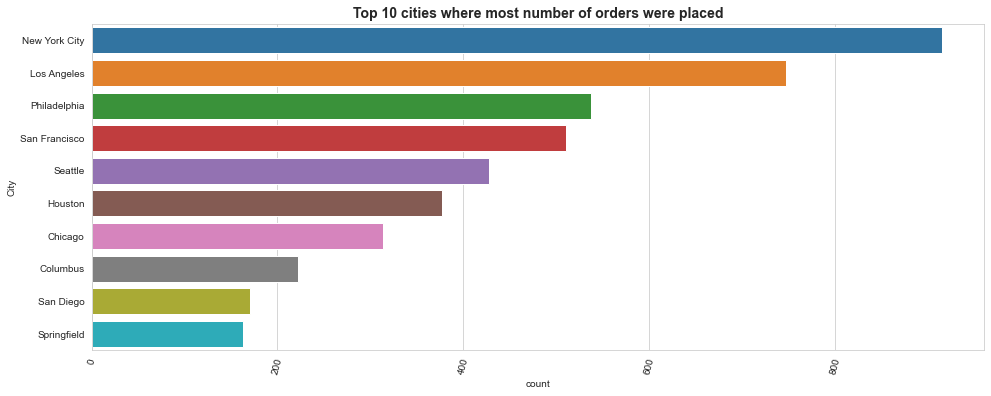

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
plt.xticks(rotation=75)
plt.title('Top 10 cities where most number of orders were placed',fontweight='bold',fontsize=14)
sns.countplot(y=df['City'],order=df['City'].value_counts().index[:10])

The **maximum orders** were:

- Placed by the **Consumer segment**

- Shipped in the **Standard class**

- Placed in the **office supplies** category

- In the **Westen region of the US**

- Either **2 or 3 items**

- **Top 3 orders** were **Bindings, Paper and furnishings respectively**

- **Top 3 cities(maximum orders)** were **New York City, Los Angeles and Philedelphia**

## Bivariate Analysis

### Region vs Profit

In [10]:
print('\033[1m'+'Mean profits region wise')
print('\t')
print(df.groupby('Region').Profit.mean())

import plotly.express as px
fig=px.violin(df,x='Region',y='Profit',color='Segment')
fig.update_layout(title='Profit vs Region')
fig.show()

Mean profits region wise
	
Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64


**Highest profit margin was in the WESTERN region of the US.**

  **Lowest profit margin was in the CENTRAL region of the US.**

### State vs profit

In [11]:
fig=px.violin(df,x='State',y='Profit')
fig.update_layout(title='State wise profits')
fig.show()

**The highest profit was made in Indiana (It has highest mean profit value).**

**Lowest profit - Ohio (It has lowest mean profit value).**

### Segment vs Profit  

In [12]:
print('\033[1m'+'Mean profits')
print('\t')
print(df.groupby('Segment').Profit.mean())

fig=px.violin(df,x='Segment',y='Profit')
fig.update_layout(title='Segment vs Profit')
fig.show()

Mean profits
	
Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64


**The Home office orders yielded maximum overall profit.**

### Category & Sub-category vs Profit

In [13]:
print('\033[1m'+'Mean profits yielded in different categories of items sold')
print('\t')
print(df.groupby('Category').Profit.mean())

fig_1=px.violin(df,x='Category',y='Profit',color='Segment')
fig_1.update_layout(title='Categories & profits')
fig_2=px.violin(df,x='Sub-Category',y='Profit',color='Segment')
fig_2.update_layout(title='Sub-categories & profits')
fig_1.show(),fig_2.show()

Mean profits yielded in different categories of items sold
	
Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


(None, None)

**Items listed under the TECHNOLOGY category yielded maximum overall profit.**

**Copiers yielded maximum profits.**

**Tables yielded minimum profits.**

### Sales vs profit

In [16]:
fig_1=px.scatter(df,x='Sales',y='Profit',color='Segment')
fig_1.update_layout(title='Sales vs profits')

### Discount vs Profit

In [15]:
fig_1=px.histogram(df,x='Discount',y='Profit',color='Segment')
fig_1.update_layout(title='Discount vs profits')

For most of the cases no discount has been offered. However, it is observed that when there is 20% discount profits have been made but for any discount percentage greater than that the superstore has suffered losses.

### Conclusions and some business strategies:

- The store should sell **more number of copiers as they have yielded the maximum profits** altogether. On the other hand, **tables yielded the least total profit amount.**


- The **mean profit amount** for **Home office orders were maximum.** Thus the store should focus on accepting more home office orders other than those from corporates and consumers.


- Highest profit margin was obtained in the **Western region of the US.**  Highest amount of **total profits** were yielded in **Indiana.** The strategy and policies functioning in these regions must be applied to other regions of the country as well to maximise profits.


- Item listed under the **technology** criteria yielded **maximum mean profits.** The store should accept more orders of such items to levarage profits.


- Thus, **if the store can afford discounts**, a good business strategy would be to **keep the discount value to around 20% of the original prices of the products in order to attract more customers.**

### Thank you!